## Guidelines
Please complete the assignment inside this notebook. Make sure the code can be executed easily.

- For question 1 and 2, 
    - write production-ready code using OOP when relevant.
    - create simple unit tests for your code where applicable.
    - add comments and documentation strings for important methods. 
    - discuss your design choices and discuss the complexity (Big O notation) of your solutions, both memory wise and performance wise. Provide map visualization when relevant
    - Try to stick to the most popular scientific Python libraries.
    - Use the provided csv files.
- For question 2, use map vizualisastion
- For question 3, no code implementation is needed

## Input data for Q1 and Q2
You should have received three csv files. Each csv-file represents the locations where a person was stationary for a certain amount of time. 
The csv-files contain the following fields:

- Latitude: The latitude of the detected GPS coordinates Longitude: The longitude of the detected GPS coordinates
- Timestamp: The start time of the stationary in the following format:
    - YYYY = year
    - MM = month of year
    - dd = day of month
    - HH=hourofday
    - mm = minute of hour
    - Z = timezone offset
- Duration: The length of time the person was stationary (in milliseconds)
    
Questions 1 and 2 in this assignment are related to this data.

## Question 1: Data lookup
Create a method that generates a lookup table allowing us to effiently check whether or not a user has ever visited a location even if the new location is not exactly the same as the visited location (some noise is added to the longitude/latitude pairs). Data to be used are in the provided csv files.

## Question 2: Home and work detection
The goal of this question, is to design and implement an algorithm that allows us to distinguish the likely home locations of a user from his likely work locations.

Note that a person might have multiple home and work locations, or might not have a work location at all. Also note that the data might be noise, incorrect and/or incomplete.

Discuss your choice of algorithms, rules, methods, distance measures, etc.

Data to be used are in the provided csv files.

0

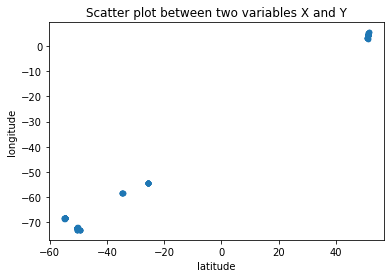

In [55]:
#Scatterplot code 

#Scatterplots of data time on weekends / weekdays

# List of tuples
import matplotlib.pyplot as plot

data = []


#df =  pd.read_csv("person1.csv",sep = ';')

#df = pd.read_csv("person2.csv",sep = ';')

df = pd.read_csv("person1.csv",sep = ';')

for index, row in df.iterrows():
    #print(index, row['latitude'], row['longitude'])
    latitude = row['latitude']
    longitude = row['longitude']
    data.append((latitude,longitude))
    
 

# Load data into pandas DataFrame       

dataFrame = pd.DataFrame(data=data, columns=['latitude','longitude']);

 

# Draw a scatter plot

dataFrame.plot.scatter(x='latitude', y='longitude', title= "Scatter plot between two variables X and Y");


import datetime
datetime.datetime.today().weekday()


This is where they work

51.038406 3.7296553
51.166862 4.7824387999999995
51.21133 4.5377035
51.214290000000005 4.4115834000000005
51.214115 4.400686299999999
51.213394 4.3912487
51.216366 4.394152
51.213203 4.409142500000001
51.21634 4.394154
51.214302 4.4115853
51.21632 4.394154
51.055316999999995 3.7139964
51.218807 4.4029417
51.21566 4.407460700000001
51.214256 4.411534
51.216316 4.3941254999999995
50.887356 4.305917
50.887306 4.305473999999999
50.911404 4.3393416
50.908875 4.4468193
51.139140000000005 4.4295464
51.21513 4.412585
51.21668 4.401192
51.219809999999995 4.4010196
51.21613 4.3944697
51.208355 4.393095
51.205859999999994 4.3983274
51.205196 4.398645
51.21632 4.3941126
51.193512 4.4105739999999996
51.193527 4.4105144
51.207916 4.402948
51.125263000000004 4.4296446
51.0352 4.4437027
51.01285 4.4511012999999995
50.868217 4.4530015
50.891277 4.4506893
50.88208 4.448717
51.041637 4.454253700000001
51.21634 4.394065
51.193366999999995 4.410419999999999
51.213673 4.405141400000

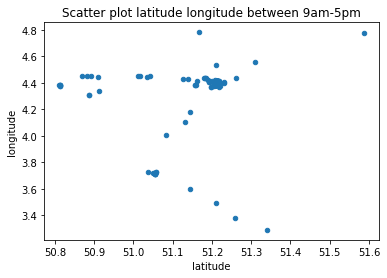

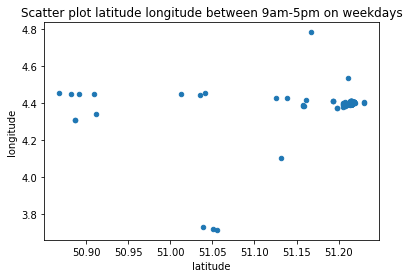

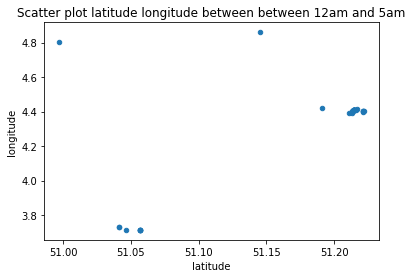

In [56]:
#detailed scatterplots
#9am-5pm
from math import radians, cos, sin, asin, sqrt
import matplotlib.pyplot as plot
import datetime
from datetime import timedelta

df = pd.read_csv("person2.csv",sep = ';')

data = []

for index, row in df.iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
    time = row['start_time(YYYYMMddHHmmZ)']
    hour = int(time[8:10])
    if(hour >= 9 and hour < 15):
        data.append((latitude,longitude))
        
    #print(hour)
    
# Load data into pandas DataFrame       

dataFrame = pd.DataFrame(data=data, columns=['latitude','longitude']);

 

# Draw a scatter plot

dataFrame.plot.scatter(x='latitude', y='longitude', title= "Scatter plot latitude longitude between 9am-5pm");


print("This is where they work\n")
data = []


for index, row in df.iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
    time = row['start_time(YYYYMMddHHmmZ)']
    year = int(time[0:4])
    month = int(time[4:6])
    day = int(time[6:8])
    hour = int(time[8:10])
    minute = int(time[10:12])
    duration = row['duration(ms)']
    duration = int(duration)
    time_delta = timedelta(milliseconds=duration)
    full_date = datetime.datetime(year=year, month=month, day=day, hour=hour, minute=minute, second=0)
    end_date = full_date + time_delta
    day_of_week = full_date.weekday()
    
    if(hour >= 9 and hour < 15 and day_of_week !=5 and day_of_week != 6):
        print(latitude,longitude)
        data.append((latitude,longitude))

# Load data into pandas DataFrame       

dataFrame = pd.DataFrame(data=data, columns=['latitude','longitude']);

 

# Draw a scatter plot

dataFrame.plot.scatter(x='latitude', y='longitude', title= "Scatter plot latitude longitude between 9am-5pm on weekdays");

        



print("This is where they sleep\n")
    
data = []

for index, row in df.iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
    time = row['start_time(YYYYMMddHHmmZ)']
    year = int(time[0:4])
    month = int(time[4:6])
    day = int(time[6:8])
    hour = int(time[8:10])
    minute = int(time[10:12])
    duration = row['duration(ms)']
    duration = int(duration)
    time_delta = timedelta(milliseconds=duration)
    full_date = datetime.datetime(year=year, month=month, day=day, hour=hour, minute=minute, second=0)
    end_date = full_date + time_delta
    day_of_week = full_date.weekday()
    
    # and day_of_week != 5 and day_of_week != 6
    if(hour < 5 or hour > 23):
        print(latitude,longitude)
        data.append((latitude,longitude))

# Load data into pandas DataFrame       

dataFrame = pd.DataFrame(data=data, columns=['latitude','longitude']);

 

# Draw a scatter plot

dataFrame.plot.scatter(x='latitude', y='longitude', title= "Scatter plot latitude longitude between between 12am and 5am");







In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("person2.csv",sep = ';')
print(df)
print(df['latitude'].min())
print(df['latitude'].max())

print(df['longitude'].min())
print(df['longitude'].max())

      latitude  longitude start_time(YYYYMMddHHmmZ)  duration(ms)
0    51.057022   3.714476         201312250036+0100      19593588
1    51.056984   3.714681         201312250608+0100      30460679
2    51.038406   3.729655         201312251451+0100        964169
3    50.880190   4.251147         201312251514+0100        262475
4    50.861668   4.475020         201312251524+0100         64461
..         ...        ...                       ...           ...
758  51.207080   4.387111         201403240822+0100      33148501
759  51.206900   4.387243         201403241742+0100         88675
760  51.206314   4.387118         201403241749+0100           157
761  51.212265   4.393786         201403241756+0100          3045
762  51.210888   4.407536         201403241802+0100           633

[763 rows x 4 columns]
50.811398
51.586678000000006
3.2878857000000004
5.0910926


In [57]:
import pandas as pd
import matplotlib.pyplot as plt


def read_file():
    df = pd.read_csv("person2.csv", sep=';')
    return df


file = read_file()
#print(file)

#df = file[13:46]

df = file[file["longitude"] >= 4.3903217]
df = df[df["longitude"] <= 4.412261]

df = df[df["latitude"] >= 51.205067]
df = df[df["latitude"] <= 51.218884]



print(df)
print(df.shape)



BBox = ((df.longitude.min(),   df.longitude.max(),      
         df.latitude.min(), df.latitude.max()))



ruh_m = plt.imread('map-4.png')


fig, ax = plt.subplots(figsize = (30,20))
ax.scatter(df.longitude, df.latitude, zorder=1, alpha= 1, c='b', s=80)
ax.set_title('Plotting')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

      latitude  longitude start_time(YYYYMMddHHmmZ)  duration(ms)
11   51.214290   4.411583         201312261103+0100       2856228
12   51.214115   4.400686         201312261202+0100          1667
13   51.213394   4.391249         201312261211+0100       9620031
14   51.217660   4.401727         201312261505+0100           924
15   51.216890   4.405530         201312261511+0100         64197
..         ...        ...                       ...           ...
754  51.216380   4.409415         201403231730+0100         61786
755  51.214360   4.411226         201403231737+0100      52019895
756  51.209800   4.395326         201403240809+0100         63412
761  51.212265   4.393786         201403241756+0100          3045
762  51.210888   4.407536         201403241802+0100           633

[377 rows x 4 columns]
(377, 4)
(4.3903217, 4.412261, 51.205067, 51.218884)


FileNotFoundError: [Errno 2] No such file or directory: 'map-4.png'

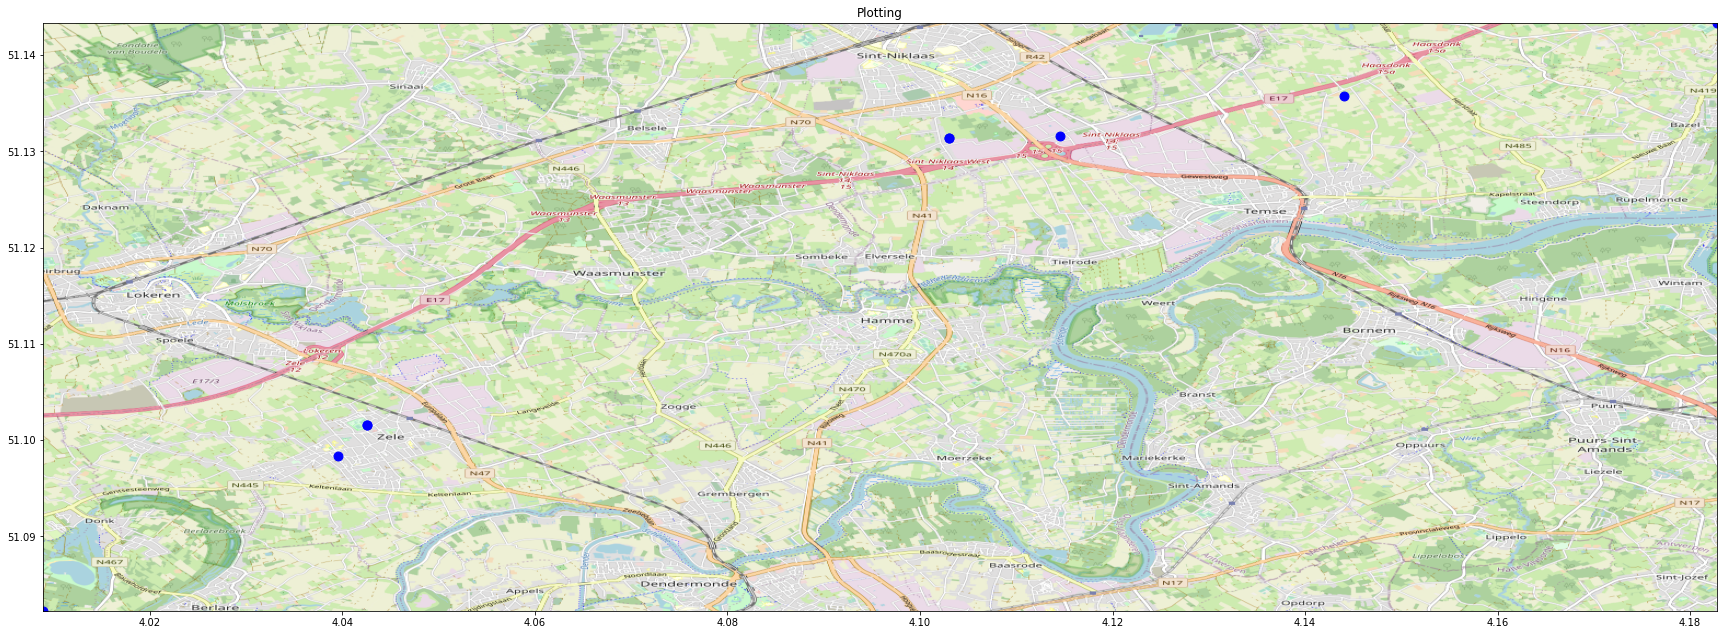

In [43]:

file = read_file()

larger_latitudes = file[file['longitude'] > 4.0]
df = larger_latitudes[larger_latitudes['longitude'] < 4.2]

BBox = ((df.longitude.min(),   df.longitude.max(),      
         df.latitude.min(), df.latitude.max()))

ruh_m = plt.imread('map-5.png')


fig, ax = plt.subplots(figsize = (30,20))
ax.scatter(df.longitude, df.latitude, zorder=1, alpha= 1, c='b', s=80)
ax.set_title('Plotting')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

In [20]:
file = read_file()
df = file[file["longitude"] >= 4.4050]
df = df[df["longitude"] <= 4.4200]

df = df[df["latitude"] >= 51.205067]
df = df[df["latitude"] <= 51.218884]



0    3.714476
1    3.714681
2    3.729655
Name: longitude, dtype: float64

## Question 3: Design a data refresh system
Have a look at the Foursquare API, more specifically, the Venues search route at
https://developer.foursquare.com/docs/venues/search
Design a system that can receive a location fix (as a [latitude, longitude, accuracy] mobile GPS fix) and run
an algorithm to find the actual venue a user has visited using Foursquare as a venues-database. The design
should minimize the use of calls to the Foursquare API and include a way to refresh Foursquare results as
data retrieved from Foursquare can only be kept for a maximum of 30 days.

Keep in mind the definition of accuracy for a mobile GPS fix. Accuracy is represented in meter and means
that there is a 68% probability that a user is within a radius of that amount of meter around the provided
[latitude, longitude] coordinates. See Android docs:
https://developer.android.com/reference/android/location/Location.html#getAccuracy()

Additionally, visiting a place is highly unlikely to yield the exact same locations (again as [latitude, longitude]
pairs) on consecutive visits. Small variations are to be expected.

The goal of this assignment is to explain the software/systems design for this component. Please
provide one or more diagrams and accompanying text.
Note: The algorithm to map a location to a venue from a list of candidates can be considered as given.

For bonus points: provide your ideas on what this algorithm could look like.

In [ ]:
#try to incorporate kafka/ data eng stuff here

#